# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [9]:
np.random.seed(47)
N_rep = 10000

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # initialize
    bs_replicates = np.empty(size)

    # generate
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

bs_result = draw_bs_reps(med_charges.charges, np.mean, N_rep)
conf_int = np.percentile(bs_result, [5])
print("replicate mean:  " + str(np.mean(bs_result)))
print("95% confidence interval lower limit: " + str(conf_int))

replicate mean:  13268.292567069491
95% confidence interval lower limit: [12724.4679217]


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__ Null hypothesis:  There is no difference between the standard deviations of insured vs. non-insured claim charges.
       
 Alternative hypothesis:  There is a difference between the standard deviations of insured vs. non-insured claim charges.

In [11]:
insured = med_charges.charges[med_charges.insuranceclaim==1]
uninsured = med_charges.charges[med_charges.insuranceclaim==0]
ins_diff = np.std(insured) - np.std(uninsured)
print("Difference of standard deviations between insured vs non-insured claim charges: " + str(ins_diff))

Difference of standard deviations between insured vs non-insured claim charges: 7596.256408655178


In [36]:
# If resampled with replacement 10,000 times, see if the difference in standard deviations of the insured vs. uninsured
# medical charges are ever the same.

np.random.seed(47)
N_rep = 10000

def draw_bs_pairs(data1, data2, func, size=1):
    """Generate pairs of bootstrap replicates and calculate standard deviation."""
    # initialize array
    bs_std_dev_replicates = np.empty(size)

    # generate samples
    for i in range(size):
        bs_data1 = np.random.choice(data1, len(data1)) 
        bs_data2 = np.random.choice(data2, len(data2))
    
        # compute the test statistic
        bs_std_dev_replicates[i] = func(bs_data1, bs_data2)
    return bs_std_dev_replicates

def diff_of_std_devs(array1, array2):
    """Difference in standard deviations of two arrays."""
    diff = np.std(array1) - np.std(array2)
    return diff

# Draw 10,000 bootstrap replicates: bs_replicates
bs_replicates = draw_bs_pairs(insured, uninsured, diff_of_std_devs, size = N_rep)

# Compute and print 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval of difference of standard deviations of insured vs uninsured medical charges = ', conf_int)

95% confidence interval of difference of standard deviations of insured vs uninsured medical charges =  [6681.572467   8502.74820416]


I reject the null hypothesis that there is no difference between the standard deviations of medical charges between insured and uninsured.  Out of 10,000 replications, the lower limit of 6,681.6 of the confidence interval is nowhere near zero difference.

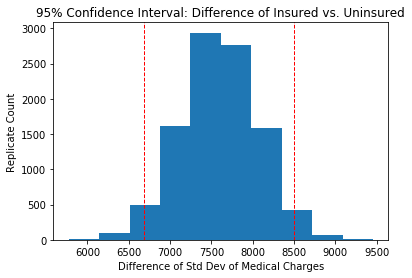

In [32]:
_=plt.hist(bs_replicates)
_=plt.title('95% Confidence Interval: Difference of Insured vs. Uninsured')
_=plt.xlabel('Difference of Std Dev of Medical Charges')
_=plt.ylabel('Replicate Count')
_=plt.axvline(np.percentile(bs_replicates, 2.5), color='r', linestyle='dashed', linewidth=1)
_=plt.axvline(np.percentile(bs_replicates, 97.5), color='r', linestyle='dashed', linewidth=1)

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__  Null hypothesis:  There is no difference between the means of Insured vs Uninsured medical charges.

  Alternate hypothesis:  There is a difference between the means of Insured vs Uninsured medical charges.

In [39]:
diff_means = np.mean(insured) - np.mean(uninsured)
diff_means

7602.506384231368

In [40]:
# Scramble the medical charges, replicate mean differences, then check if the observed mean above is possible.

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    # split permutation into same sizes as source data
    perm_sample1 = permuted_data[:len(data1)] # up to size of first array
    perm_sample2 = permuted_data[len(data1):] # remainder of data
    
    return perm_sample1, perm_sample2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # initialize array
    perm_replicates = np.empty(size)

    # generate sample
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
    
        # compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def diff_of_means(array1, array2):
    """Difference in standard deviations of two arrays."""
    diff = np.mean(array1) - np.mean(array2)
    return diff

# Compute difference of means of medical charges based on insurance
empirical_diff_mean = diff_of_means(insured, uninsured)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(insured, uninsured, diff_of_means, size = N_rep)

# Compute and print p-value: p
p = np.sum(perm_replicates >= empirical_diff_mean) / len(perm_replicates)
print('p-value = ', p)


p-value =  0.0


A p-value of zero indicates rejection of the null hypothesis that there is no difference between the mean medical charges of insured vs uninsured patients.  When the charges were scrambled, 10,000 replications could not reproduce the observed difference in means of $7,602.51.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__  I plotted two lines to represent the observed mean difference as positive and negative for comparison to the scrambled permutations which could also generate negative differences.

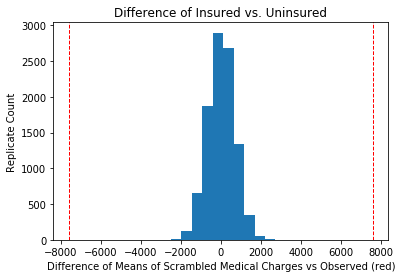

In [49]:
_=plt.hist(perm_replicates)
_=plt.title('Difference of Insured vs. Uninsured')
_=plt.xlabel('Difference of Means of Scrambled Medical Charges vs Observed (red)')
_=plt.ylabel('Replicate Count')
_=plt.axvline(empirical_diff_mean, color='r', linestyle='dashed', linewidth=1)
_=plt.axvline((empirical_diff_mean*(-1)), color='r', linestyle='dashed', linewidth=1)

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__  The p-value found utilizing the t-test function was also extremely small, confirming results.  I found the bootstrap process far easier to comprehend and conduct, but I do not believe my laptop has the memory to conduct enough iterations to observe the large difference.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__  The Welch's t-test shown was described as used when the sample variances are not equal, such as with our Insured vs Uninsured medical charges.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__  I would use the two-sided test above with a null hypothesis that the click-through rate for algorithm A was equal to or greater than algorithm B, and the alternative hypothesis would be that the click-through rate for algorithm B was greather than algorithm A.  The real-world consequences for rejecting the null hypothesis is confirming the new algorithm B increases click-through rates, and it should now be determined whether the cost of implementing algorithm B is worthwhile.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.